# Análise de Dados de Jogadores de Críquete

Este notebook foi desenvolvido como um exercício prático para aprimorar conhecimentos em Python, com foco em técnicas de limpeza, organização e análise de dados. Utilizando um conjunto de dados de jogadores de críquete, foram aplicados diversos métodos de tratamento de dados, identificação e remoção de duplicatas, conversão de tipos, criação de novas variáveis e análise estatística básica. O objetivo principal é demonstrar o fluxo de trabalho em ciência de dados, desde a importação até a obtenção de insights relevantes.

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv('espn.csv', sep=';')
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,DG Bradman (AUS),1928-1948,52,80,10,6996,334,99.94,9800+,58.60,29,13,7,626+,6
1,PHKD Mendis (SL),2022-2025,14,24,3,1316,182*,62.66,2063,63.79,5,5,-,137,24
2,AC Voges (AUS),2015-2016,20,31,7,1485,269*,61.87,2667,55.68,5,4,2,186,5
3,RG Pollock (SA),1963-1970,23,41,4,2256,274,60.97,1707+,54.48,7,11,1,246+,11
4,GA Headley (WI),1930-1954,22,40,4,2190,270*,60.83,416+,56.00,10,5,2,104+,1


Alterando nomes de colunas para melhor entendimento do conteúdo.

In [33]:
df = df.rename(columns={'HS': 'Highest_inns_score',
                        'NO': 'Not_outs',
                        'BF': 'Balls_faced',
                        'SR': 'Batting_strike_rate',
                        'Mat': 'Matches'})

df.head()


,Player,Span,Matches,Inns,Not_outs,Runs,Highest_inns_score,Ave,Balls_faced,Batting_strike_rate,100,50,0,4s,6s
0,DG Bradman (AUS),1928-1948,52,80,10,6996,334,99.94,9800+,58.60,29,13,7,626+,6
1,PHKD Mendis (SL),2022-2025,14,24,3,1316,182*,62.66,2063,63.79,5,5,-,137,24
2,AC Voges (AUS),2015-2016,20,31,7,1485,269*,61.87,2667,55.68,5,4,2,186,5
3,RG Pollock (SA),1963-1970,23,41,4,2256,274,60.97,1707+,54.48,7,11,1,246+,11
4,GA Headley (WI),1930-1954,22,40,4,2190,270*,60.83,416+,56.00,10,5,2,104+,1


Checando se existem valores nulos em algumas das colunas.

In [34]:
df.isnull().any()

Player                 False
Span                   False
Matches                False
Inns                   False
Not_outs               False
Runs                   False
Highest_inns_score     False
Ave                    False
Balls_faced             True
Batting_strike_rate     True
100                    False
50                     False
0                      False
4s                     False
6s                     False
dtype: bool

In [35]:
lista_index_isna = df[df['Balls_faced'].isna()==1].index.tolist()
df[df['Balls_faced'].isna()==1]


,Player,Span,Matches,Inns,Not_outs,Runs,Highest_inns_score,Ave,Balls_faced,Batting_strike_rate,100,50,0,4s,6s
10,ED Weekes (WI),1948-1958,48,81,5,4455,207,58.61,NaN,NaN,15,19,6,258+,2
11,ED Weekes (WI),1948-1958,48,81,5,4455,207,58.61,NaN,NaN,15,19,6,258+,2
16,CL Walcott (WI),1948-1960,44,74,7,3798,220,56.68,NaN,NaN,15,14,1,107+,11
59,Hon.FS Jackson (ENG),1893-1905,20,33,4,1415,144*,48.79,NaN,NaN,5,6,3,51+,0


Os valores identificados como NaN serão substituídos com zero.

In [36]:
df['Balls_faced'] = df['Balls_faced'].fillna(0)
df['Batting_strike_rate'] = df['Batting_strike_rate'].fillna(0)

In [37]:
df.iloc[lista_index_isna]

,Player,Span,Matches,Inns,Not_outs,Runs,Highest_inns_score,Ave,Balls_faced,Batting_strike_rate,100,50,0,4s,6s
10,ED Weekes (WI),1948-1958,48,81,5,4455,207,58.61,0,0.0,15,19,6,258+,2
11,ED Weekes (WI),1948-1958,48,81,5,4455,207,58.61,0,0.0,15,19,6,258+,2
16,CL Walcott (WI),1948-1960,44,74,7,3798,220,56.68,0,0.0,15,14,1,107+,11
59,Hon.FS Jackson (ENG),1893-1905,20,33,4,1415,144*,48.79,0,0.0,5,6,3,51+,0


Identificando possíveis valores duplicados.

In [38]:
df[df.duplicated()==1]


,Player,Span,Matches,Inns,Not_outs,Runs,Highest_inns_score,Ave,Balls_faced,Batting_strike_rate,100,50,0,4s,6s
11,ED Weekes (WI),1948-1958,48,81,5,4455,207,58.61,0,0.00,15,19,6,258+,2
19,SPD Smith (AUS),2010-2025,118,210,25,10424,239,56.34,19438,53.62,36,43,11,1134,62
32,R Dravid (ICC/IND),1996-2012,164,286,32,13288,270,52.31,31258,42.51,36,63,8,1654,21
42,SR Waugh (AUS),1985-2004,168,260,46,10927,200,51.06,22461,48.64,32,50,22,1175,20


In [39]:
lista_duplicados = df[df.duplicated()==1]
lista_duplicados = lista_duplicados['Player'].tolist()

In [40]:
df[df['Player'].isin(lista_duplicados)]

,Player,Span,Matches,Inns,Not_outs,Runs,Highest_inns_score,Ave,Balls_faced,Batting_strike_rate,100,50,0,4s,6s
10,ED Weekes (WI),1948-1958,48,81,5,4455,207,58.61,0,0.00,15,19,6,258+,2
11,ED Weekes (WI),1948-1958,48,81,5,4455,207,58.61,0,0.00,15,19,6,258+,2
18,SPD Smith (AUS),2010-2025,118,210,25,10424,239,56.34,19438,53.62,36,43,11,1134,62
19,SPD Smith (AUS),2010-2025,118,210,25,10424,239,56.34,19438,53.62,36,43,11,1134,62
31,R Dravid (ICC/IND),1996-2012,164,286,32,13288,270,52.31,31258,42.51,36,63,8,1654,21
32,R Dravid (ICC/IND),1996-2012,164,286,32,13288,270,52.31,31258,42.51,36,63,8,1654,21
41,SR Waugh (AUS),1985-2004,168,260,46,10927,200,51.06,22461,48.64,32,50,22,1175,20
42,SR Waugh (AUS),1985-2004,168,260,46,10927,200,51.06,22461,48.64,32,50,22,1175,20


In [41]:
df = df.drop_duplicates()
df[df['Player'].isin(lista_duplicados)]


,Player,Span,Matches,Inns,Not_outs,Runs,Highest_inns_score,Ave,Balls_faced,Batting_strike_rate,100,50,0,4s,6s
10,ED Weekes (WI),1948-1958,48,81,5,4455,207,58.61,0,0.00,15,19,6,258+,2
18,SPD Smith (AUS),2010-2025,118,210,25,10424,239,56.34,19438,53.62,36,43,11,1134,62
31,R Dravid (ICC/IND),1996-2012,164,286,32,13288,270,52.31,31258,42.51,36,63,8,1654,21
41,SR Waugh (AUS),1985-2004,168,260,46,10927,200,51.06,22461,48.64,32,50,22,1175,20


Dividindo a coluna Span em dois valores e em colunas distintas.

In [42]:
df['Span']

0     1928-1948
1     2022-2025
2     2015-2016
3     1963-1970
4     1930-1954
        ...    
63    2002-2014
64    1924-1934
65    1930-1938
66    2013-2025
67    1928-1934
Name: Span, Length: 64, dtype: object

In [43]:
df['Span'].str.split(pat='-')

0     [1928, 1948]
1     [2022, 2025]
2     [2015, 2016]
3     [1963, 1970]
4     [1930, 1954]
          ...     
63    [2002, 2014]
64    [1924, 1934]
65    [1930, 1938]
66    [2013, 2025]
67    [1928, 1934]
Name: Span, Length: 64, dtype: object

In [44]:
df['Rookie_year'] = df['Span'].str.split(pat='-').str[0]
df['Last_year'] = df['Span'].str.split(pat='-').str[1]
df.head()

,Player,Span,Matches,Inns,Not_outs,Runs,Highest_inns_score,Ave,Balls_faced,Batting_strike_rate,100,50,0,4s,6s,Rookie_year,Last_year
0,DG Bradman (AUS),1928-1948,52,80,10,6996,334,99.94,9800+,58.60,29,13,7,626+,6,1928,1948
1,PHKD Mendis (SL),2022-2025,14,24,3,1316,182*,62.66,2063,63.79,5,5,-,137,24,2022,2025
2,AC Voges (AUS),2015-2016,20,31,7,1485,269*,61.87,2667,55.68,5,4,2,186,5,2015,2016
3,RG Pollock (SA),1963-1970,23,41,4,2256,274,60.97,1707+,54.48,7,11,1,246+,11,1963,1970
4,GA Headley (WI),1930-1954,22,40,4,2190,270*,60.83,416+,56.00,10,5,2,104+,1,1930,1954


Uma vez que a coluna Span não é mais necessaria, ela pode ser excluída.

In [45]:
df = df.drop(['Span'], axis=1)

In [46]:
df.head()

,Player,Matches,Inns,Not_outs,Runs,Highest_inns_score,Ave,Balls_faced,Batting_strike_rate,100,50,0,4s,6s,Rookie_year,Last_year
0,DG Bradman (AUS),52,80,10,6996,334,99.94,9800+,58.60,29,13,7,626+,6,1928,1948
1,PHKD Mendis (SL),14,24,3,1316,182*,62.66,2063,63.79,5,5,-,137,24,2022,2025
2,AC Voges (AUS),20,31,7,1485,269*,61.87,2667,55.68,5,4,2,186,5,2015,2016
3,RG Pollock (SA),23,41,4,2256,274,60.97,1707+,54.48,7,11,1,246+,11,1963,1970
4,GA Headley (WI),22,40,4,2190,270*,60.83,416+,56.00,10,5,2,104+,1,1930,1954


Criar uma coluna Country com as informações dos países contidas na coluna Player.

In [47]:
df['Player']

0      DG Bradman (AUS)
1      PHKD Mendis (SL)
2        AC Voges (AUS)
3       RG Pollock (SA)
4       GA Headley (WI)
            ...        
63    GC Smith (ICC/SA)
64    WH Ponsford (AUS)
65      SJ McCabe (AUS)
66    SC Williams (ZIM)
67     DR Jardine (ENG)
Name: Player, Length: 64, dtype: object

In [48]:
df['Country'] = df['Player'].str.split(pat='(').str[1]
df['Country'] = df['Country'].str.split(pat=')').str[0]
df['Country']

0        AUS
1         SL
2        AUS
3         SA
4         WI
       ...  
63    ICC/SA
64       AUS
65       AUS
66       ZIM
67       ENG
Name: Country, Length: 64, dtype: object

In [49]:
df['Player'] = df['Player'].str.split(pat='(').str[0]

In [50]:
df.head()

,Player,Matches,Inns,Not_outs,Runs,Highest_inns_score,Ave,Balls_faced,Batting_strike_rate,100,50,0,4s,6s,Rookie_year,Last_year,Country
0,DG Bradman,52,80,10,6996,334,99.94,9800+,58.60,29,13,7,626+,6,1928,1948,AUS
1,PHKD Mendis,14,24,3,1316,182*,62.66,2063,63.79,5,5,-,137,24,2022,2025,SL
2,AC Voges,20,31,7,1485,269*,61.87,2667,55.68,5,4,2,186,5,2015,2016,AUS
3,RG Pollock,23,41,4,2256,274,60.97,1707+,54.48,7,11,1,246+,11,1963,1970,SA
4,GA Headley,22,40,4,2190,270*,60.83,416+,56.00,10,5,2,104+,1,1930,1954,WI


Limpeza de dados com a retirada de símbolos de colunas numéricas.

In [51]:
df['Balls_faced'] = df['Balls_faced'].str.split(pat='+').str[0]
df['Highest_inns_score'] = df['Highest_inns_score'].str.split(pat='*').str[0]
df['4s'] = df['4s'].str.split(pat='+').str[0]
df['6s'] = df['6s'].str.split(pat='+').str[0]
df.head()


,Player,Matches,Inns,Not_outs,Runs,Highest_inns_score,Ave,Balls_faced,Batting_strike_rate,100,50,0,4s,6s,Rookie_year,Last_year,Country
0,DG Bradman,52,80,10,6996,334,99.94,9800,58.60,29,13,7,626,6,1928,1948,AUS
1,PHKD Mendis,14,24,3,1316,182,62.66,2063,63.79,5,5,-,137,24,2022,2025,SL
2,AC Voges,20,31,7,1485,269,61.87,2667,55.68,5,4,2,186,5,2015,2016,AUS
3,RG Pollock,23,41,4,2256,274,60.97,1707,54.48,7,11,1,246,11,1963,1970,SA
4,GA Headley,22,40,4,2190,270,60.83,416,56.00,10,5,2,104,1,1930,1954,WI


Verificando se o tipo de dados de cada coluna é compatível com os valores inseridos nelas.

In [52]:
df.dtypes

Player                  object
Matches                  int64
Inns                     int64
Not_outs                 int64
Runs                     int64
Highest_inns_score      object
Ave                    float64
Balls_faced             object
Batting_strike_rate    float64
100                      int64
50                       int64
0                       object
4s                      object
6s                      object
Rookie_year             object
Last_year               object
Country                 object
dtype: object

In [53]:
df[df['Balls_faced'].isna()==1]

,Player,Matches,Inns,Not_outs,Runs,Highest_inns_score,Ave,Balls_faced,Batting_strike_rate,100,50,0,4s,6s,Rookie_year,Last_year,Country
10,ED Weekes,48,81,5,4455,207,58.61,NaN,0.0,15,19,6,258,2,1948,1958,WI
16,CL Walcott,44,74,7,3798,220,56.68,NaN,0.0,15,14,1,107,11,1948,1960,WI
59,Hon.FS Jackson,20,33,4,1415,144,48.79,NaN,0.0,5,6,3,51,0,1893,1905,ENG


In [54]:


df['Balls_faced'] = df['Balls_faced'].fillna(0) # foi necessário refazer o comando pois os valores voltaram a ser NaN

colunas_para_converter = ['Matches', 'Highest_inns_score', 'Balls_faced', 'Rookie_year', 'Last_year']
for coluna in colunas_para_converter:
    df[coluna] = df[coluna].astype(int)

In [55]:
df.dtypes

Player                  object
Matches                  int32
Inns                     int64
Not_outs                 int64
Runs                     int64
Highest_inns_score       int32
Ave                    float64
Balls_faced              int32
Batting_strike_rate    float64
100                      int64
50                       int64
0                       object
4s                      object
6s                      object
Rookie_year              int32
Last_year                int32
Country                 object
dtype: object

Calculando o tempo de carreira dos atletas.

In [56]:
df['Carrer_length'] = df['Last_year'] - df['Rookie_year']
df.head()

,Player,Matches,Inns,Not_outs,Runs,Highest_inns_score,Ave,Balls_faced,Batting_strike_rate,100,50,0,4s,6s,Rookie_year,Last_year,Country,Carrer_length
0,DG Bradman,52,80,10,6996,334,99.94,9800,58.60,29,13,7,626,6,1928,1948,AUS,20
1,PHKD Mendis,14,24,3,1316,182,62.66,2063,63.79,5,5,-,137,24,2022,2025,SL,3
2,AC Voges,20,31,7,1485,269,61.87,2667,55.68,5,4,2,186,5,2015,2016,AUS,1
3,RG Pollock,23,41,4,2256,274,60.97,1707,54.48,7,11,1,246,11,1963,1970,SA,7
4,GA Headley,22,40,4,2190,270,60.83,416,56.00,10,5,2,104,1,1930,1954,WI,24


Cálculo da média em anos do tempo de carreira.

In [57]:
df['Carrer_length'].mean().round(2)

12.8

A média da taxa de acerto de rebatidas para jogadores que joraram mais de 10 anos.

In [58]:
df[df['Carrer_length'] > 10]['Batting_strike_rate'].mean().round(2)

48.18

Número de jogadores que jogaram antes de 1960.

In [59]:
df[df['Rookie_year'] < 1960]['Player'].count()

23

O número máximo de pontuações mais altas por país.

In [60]:
df.groupby('Country')['Highest_inns_score'].max().to_frame('max_score').reset_index().sort_values(by='max_score', ascending=False)

,Country,max_score
5,ICC/WI,400
0,AUS,380
10,SL,374
11,WI,365
1,ENG,364
3,ICC/PAK,329
2,ICC/IND,319
8,PAK,313
9,SA,278
4,ICC/SA,277


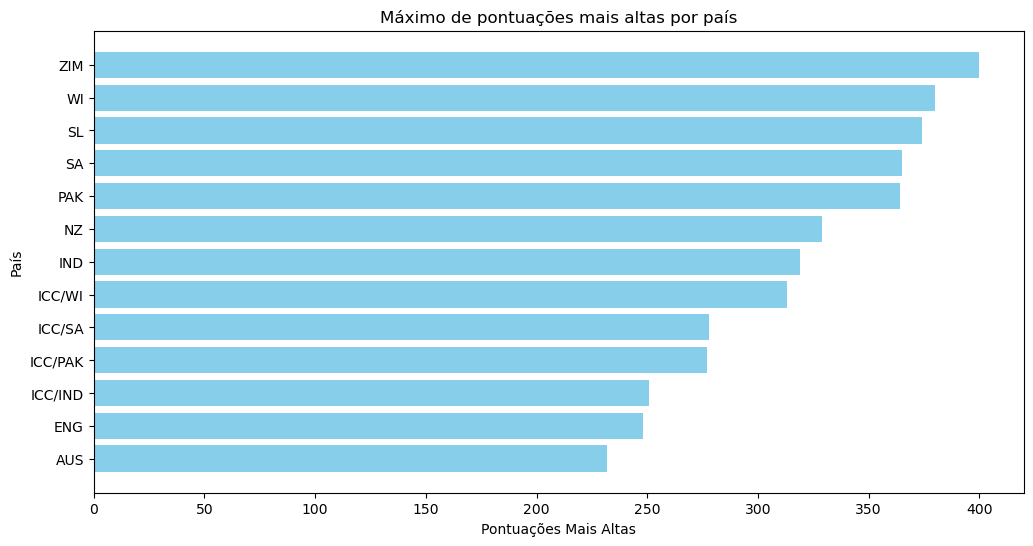

In [ ]:
plt.figure(figsize=(12, 6))
plt.barh(df.groupby('Country')['Highest_inns_score'].max().index, 
           df.groupby('Country')['Highest_inns_score'].max().sort_values(ascending=True).values, 
           color='skyblue')
plt.xlabel('Pontuações Mais Altas')
plt.ylabel('País')
plt.title('Máximo de pontuações mais altas por país')
plt.show()